<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING MDSAA-BA </h1> </center> <br>
<center> TECHSCAPE PROJECT 2021/2022 </center>

In [1]:
# Podemos usar um indice deste genero, para ser mais fácil navegarmos no código 

**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import the Dataset](#importdataset)
* [2. Initial Analysis](#initialanalysis)
* [3. Definition of the initial Metric and Non-metric Features](#defeatures)
* [4. Impute Missing Values on Non-Metric Features](#imputeMV)
* [5. Further Analysis](#FurtherAnalysis)
* [6. Variables' Distribution](#VarsDistribution)
    * [6.1. Categorical Variables - Histograms](#CatVarDist)
    * [6.2. Numeric Variables - Histograms](#NumVarDist)
    * [6.3. Numeric Variables - Boxplots](#NumVarBox)
* [7. Coherence Checking](#Check)
* [8. Transform Variables](#TransformVar)
* [9. Coherence Checking - Age](#CheckAge)
* [10. Outlier Removal](#outlier)
    * [10.1. Outlier Removal - Defining Features](#outdefeatures)
    * [10.2. Variables' Histograms](#hist)
    * [10.3. Outlier Removal - Filtering](#outfiltering)
         * [10.3.1. Filters 1 - Manual](#manual)
         * [10.3.2. Filters 2 - IQR](#iqr)
         * [10.3.3. Filters 3 - Manual & IQR](#manualiqr)

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [183]:
import pandas as pd
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import calendar

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importdataset">

## 1.2. Import the Dataset

</a>

In [184]:
techscape = pd.read_csv('train.csv')

print(techscape.shape)
techscape.head(3)

(9999, 17)


,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


# Check for missing data

In [185]:
techscape.info()
# There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

# Change the types of the variables

In [186]:
def change_data_types(df):
    # ID does not make sense to be a int
    df.Access_ID = df.Access_ID.astype('string') 

    # Tranform Date into a datetime format
    df.Date = pd.to_datetime(df.Date)
    
    # Transform these variables into Strings
    df.OS = df.OS.astype('string') 
    df.Country = df.Country.astype('string') 
    df.Type_of_Visitor = df.Type_of_Visitor.astype('string') 
    df.Type_of_Traffic = df.Type_of_Traffic.astype('string') 
    df.Browser = df.Browser.astype('string') 
    
    return df

In [187]:
# Call the function created above (with techscape)
techscape = change_data_types(techscape)
techscape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Access_ID                   9999 non-null   string        
 1   Date                        9999 non-null   datetime64[ns]
 2   AccountMng_Pages            9999 non-null   int64         
 3   AccountMng_Duration         9999 non-null   float64       
 4   FAQ_Pages                   9999 non-null   int64         
 5   FAQ_Duration                9999 non-null   float64       
 6   Product_Pages               9999 non-null   int64         
 7   Product_Duration            9999 non-null   float64       
 8   GoogleAnalytics_BounceRate  9999 non-null   float64       
 9   GoogleAnalytics_ExitRate    9999 non-null   float64       
 10  GoogleAnalytics_PageValue   9999 non-null   float64       
 11  OS                          9999 non-null   string      

# Feature Engineering

In [188]:
def create_new_variables(df):
    
    # Create binary variables for the most common operating systems
    df['Apple'] = df['OS'].apply(lambda x: bool(1) if x == 'MacOSX' or x == 'iOS' else bool(0))  
    df['Windows'] = df['OS'].apply(lambda x: bool(1) if x == 'Windows' else bool(0))  
    df['Android'] = df['OS'].apply(lambda x: bool(1) if x == 'Android' else bool(0))

    # Create binary variables for type of visitors
    df['Returner'] = df['Type_of_Visitor'].apply(lambda x: bool(1) if x == 'Returner' else bool(0)) 
    df['New_Access'] = df['Type_of_Visitor'].apply(lambda x: bool(1) if x == 'New_Access' else bool(0))

    # Create the total duration of the visits and total number of page visits
    df['Total_Duration'] = df['AccountMng_Duration'] + df['FAQ_Duration'] + df['Product_Duration']
    df['Total_Pages'] = df['AccountMng_Pages'] + df['FAQ_Pages'] + df['Product_Pages']
        
    # Correct incoherent values of total_pages and total_duration
    df.loc[df['Total_Pages']==0,'Total_Pages']=1
    df.loc[df['Total_Duration']==0,'Total_Duration']=1

    # Create the proportion of time on each page type
    df['PropTime_AccountMng'] = df['AccountMng_Duration']/df['Total_Duration']
    df['PropTime_FAQ'] = df['FAQ_Duration']/df['Total_Duration']
    df['PropTime_Product'] = df['Product_Duration']/df['Total_Duration']

    # Create the proportion of visited pages of each type
    df['PropPages_AccountMng'] = df['AccountMng_Pages']/df['Total_Pages']
    df['PropPages_FAQ'] = df['FAQ_Pages']/df['Total_Pages']
    df['PropPages_Product'] = df['Product_Pages']/df['Total_Pages']

    # Create the average time spent per page and type of page
    df['AvgTimePerPage'] = df['Total_Duration'].div(df['Total_Pages'].values)

    df['AvgTimeOnAccountMng'] = df['AccountMng_Duration'].div(df['AccountMng_Pages'].values)
    df['AvgTimeOnFAQ'] = df['FAQ_Duration'].div(df['FAQ_Pages'].values)
    df['AvgTimeOnProduct'] = df['Product_Duration'].div(df['Product_Pages'].values)

    # Correct incoherent values of AvgTimeOnAccountMng, AvgTimeOnFAQ and AvgTimeOnProduct
    df.loc[df['AccountMng_Pages']==0,'AvgTimeOnAccountMng']=0
    df.loc[df['FAQ_Pages']==0,'AvgTimeOnFAQ']=0
    df.loc[df['Product_Pages']==0,'AvgTimeOnProduct']=0

    # Create the month of the visit
    df['Month'] = df['Date'].dt.month

    # Create variable Covid
    df['Covid'] = df['Month'].apply(lambda x: bool(1) if x>3 else bool(0))

    # Create dummy variables from the categorical ones
    df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
    month = pd.DataFrame(pd.get_dummies(df['Month'], drop_first = True, dtype=bool))

    df['Type_of_Traffic'] = df['Type_of_Traffic'].apply(lambda x: 'Traffic_' + str(x))
    type_traffic = pd.DataFrame(pd.get_dummies(df['Type_of_Traffic'], drop_first = True, dtype=bool))

    df['Browser'] = df['Browser'].apply(lambda x: 'Browser_' + str(x))
    browser = pd.DataFrame(pd.get_dummies(df['Browser'], drop_first = True, dtype=bool))
    
    country=pd.DataFrame(pd.get_dummies(df['Country'], drop_first = True, dtype=bool))

    df = pd.concat((df,month,type_traffic,browser,country), axis=1)
    
    return df

In [189]:
# Call the function created above (with techscape)
techscape = create_new_variables(techscape)

print(techscape.shape)
display(techscape.head(3))

(9999, 78)


,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,...,Browser_7,Browser_8,France,Germany,Italy,Other,Portugal,Spain,Switzerland,United Kingdom
0,102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0000,0.0667,...,False,False,False,False,False,False,True,False,False,False
1,103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,...,False,False,True,False,False,False,False,False,False,False
2,103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.0250,0.0583,...,False,False,False,False,True,False,False,False,False,False


In [190]:
# Remove unwanted columns from the dataset
techscape.drop('Access_ID', axis=1, inplace=True)
techscape.drop('OS', axis=1, inplace=True)
techscape.drop('Country', axis=1, inplace=True)
techscape.drop('Type_of_Visitor', axis=1, inplace=True)
techscape.drop('Browser', axis=1, inplace=True)
techscape.drop('Type_of_Traffic', axis=1, inplace=True)
techscape.drop('Date', axis=1, inplace=True)
techscape.drop('Month', axis=1, inplace=True)

print(techscape.shape)

(9999, 70)


# Feature Selection

In [191]:
# Define data as all the independent variables
data = techscape.drop(['Buy'], axis=1)

# Define target as the dependent variable
target = techscape['Buy']

In [192]:
# Subset of data including only the numerical features
data_metric = data.select_dtypes(include=np.number).set_index(data.index)
data_non_metric = data.select_dtypes(exclude=np.number).set_index(data.index)

# Scale the data
scaler = MinMaxScaler()

data_metric_scaled = pd.DataFrame(scaler.fit_transform(data_metric), columns = data_metric.columns).set_index(data.index)

Filter Methods:

In [193]:
# Check if any of the variables is univariate
data_metric_scaled.var()

# There aren't univariate variables
# Keep: all
# Remove: none

AccountMng_Pages              0.015309
AccountMng_Duration           0.002796
FAQ_Pages                     0.002842
FAQ_Duration                  0.003007
Product_Pages                 0.003993
Product_Duration              0.000937
GoogleAnalytics_BounceRate    0.059477
GoogleAnalytics_ExitRate      0.059647
GoogleAnalytics_PageValue     0.002687
Total_Duration                0.000891
Total_Pages                   0.003914
PropTime_AccountMng           0.022304
PropTime_FAQ                  0.005453
PropTime_Product              0.072971
PropPages_AccountMng          0.016076
PropPages_FAQ                 0.002479
PropPages_Product             0.020185
AvgTimePerPage                0.000952
AvgTimeOnAccountMng           0.000841
AvgTimeOnFAQ                  0.001380
AvgTimeOnProduct              0.001021
dtype: float64

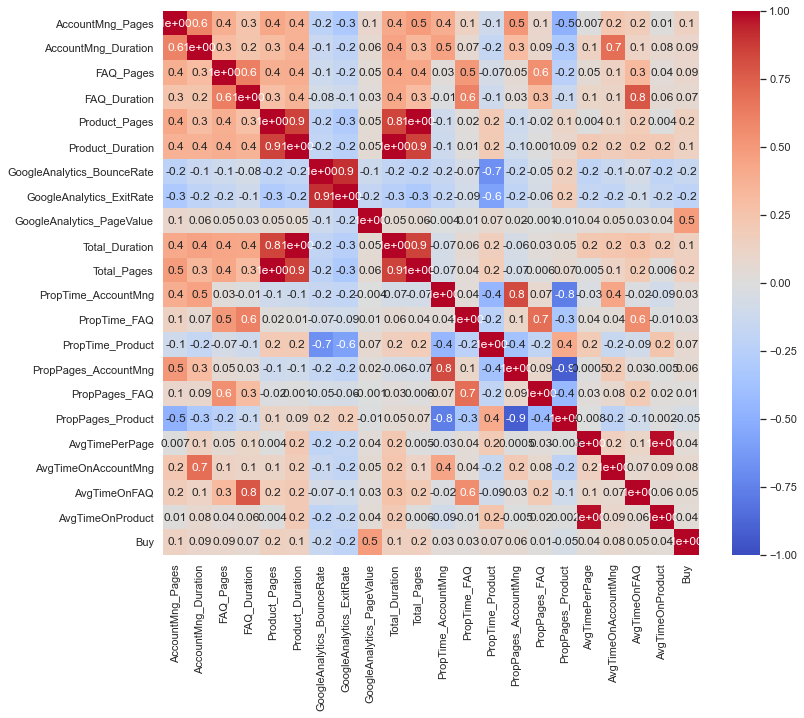

In [194]:
# ------------ Spearman Correlation ------------

# Check correlations
all_data = data_metric_scaled.join(target)

corr = all_data.corr(method = 'pearson')  # or spearman

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, vmin=-1, vmax=1, annot = True, cmap ="coolwarm" , fmt='.1')

    plt.show()
    
cor_heatmap(corr) 

In [195]:
# Better visualization of correlation values (numerical data)

corr.style.applymap(lambda x: 'background-color : green' if x > 0.85 else ('background-color : red' if x < -0.85 else ''))

# Higly correlated variables:
# Product_Pages - Product_Duration
# Product_Pages - Total_Pages
# Product_Duration - Total_Pages
# Product_Duration - Total_Duration
# GoogleAnalytics_BounceRate - GoogleAnalytics_ExitRate
# PropTime_AccountMng - PropTime_Product
# PropPages_AccountMng - PropPages_Product
# AvgTimePerPage - AvgTimeOnProduct

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Total_Duration,Total_Pages,PropTime_AccountMng,PropTime_FAQ,PropTime_Product,PropPages_AccountMng,PropPages_FAQ,PropPages_Product,AvgTimePerPage,AvgTimeOnAccountMng,AvgTimeOnFAQ,AvgTimeOnProduct,Buy
AccountMng_Pages,1.000000,0.607348,0.383062,0.256978,0.427517,0.368118,-0.224157,-0.317452,0.098760,0.414900,0.490820,0.395606,0.134625,-0.102913,0.508738,0.097996,-0.485421,0.006731,0.229207,0.176130,0.010078,0.136236
AccountMng_Duration,0.607348,1.000000,0.306807,0.243544,0.297512,0.368208,-0.145261,-0.206124,0.062708,0.447902,0.336322,0.457693,0.067944,-0.171568,0.310588,0.086478,-0.305578,0.136121,0.692725,0.126352,0.078017,0.094645
FAQ_Pages,0.383062,0.306807,1.000000,0.619495,0.388860,0.392125,-0.116902,-0.164793,0.045593,0.435837,0.426590,0.027480,0.505648,-0.066654,0.054873,0.551266,-0.240486,0.048021,0.137120,0.318753,0.035926,0.092508
FAQ_Duration,0.256978,0.243544,0.619495,1.000000,0.286298,0.361224,-0.075673,-0.107378,0.029710,0.426887,0.309077,-0.011235,0.610341,-0.105902,0.033611,0.300404,-0.134229,0.106840,0.112649,0.785655,0.059553,0.067509
Product_Pages,0.427517,0.297512,0.388860,0.286298,1.000000,0.857664,-0.205078,-0.292165,0.052234,0.849528,0.997151,-0.107189,0.015861,0.205692,-0.116707,-0.016495,0.112938,0.003749,0.115409,0.184858,0.004112,0.153968
Product_Duration,0.368118,0.368208,0.392125,0.361224,0.857664,1.000000,-0.182305,-0.247934,0.047423,0.994191,0.856933,-0.118989,0.010533,0.198562,-0.096688,0.001347,0.088404,0.213875,0.178767,0.215294,0.217237,0.146043
GoogleAnalytics_BounceRate,-0.224157,-0.145261,-0.116902,-0.075673,-0.205078,-0.182305,1.000000,0.913050,-0.119419,-0.188534,-0.215252,-0.160590,-0.070259,-0.676993,-0.171820,-0.049518,0.155592,-0.200743,-0.137171,-0.067386,-0.198117,-0.151626
GoogleAnalytics_ExitRate,-0.317452,-0.206124,-0.164793,-0.107378,-0.292165,-0.247934,0.913050,1.000000,-0.174556,-0.257488,-0.306501,-0.182901,-0.085539,-0.582309,-0.200175,-0.057619,0.185537,-0.168829,-0.183856,-0.095865,-0.167185,-0.207968
GoogleAnalytics_PageValue,0.098760,0.062708,0.045593,0.029710,0.052234,0.047423,-0.119419,-0.174556,1.000000,0.051878,0.058253,-0.004064,0.010626,0.069747,0.017166,-0.001242,-0.013541,0.038965,0.049781,0.028662,0.042160,0.486579
Total_Duration,0.414900,0.447902,0.435837,0.426887,0.849528,0.994191,-0.188534,-0.257488,0.051878,1.000000,0.853709,-0.073004,0.056609,0.164355,-0.061742,0.028827,0.047659,0.219533,0.234922,0.265511,0.214518,0.149693


Wrapper and Embeded Methods:

In [196]:
# Create a Stratified KFold with 10 splits
skf = StratifiedKFold(n_splits=10)

In [197]:
#----------------------------- Lasso and Decision Tree -----------------------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR LASSO
#        reg = LassoCV()
#        lasso = reg.fit(X_train_metric_scaled, y_train)
#        importance = np.abs(lasso.coef_)
#        
#        # CODE FOR DT
#        gini_importance = DecisionTreeClassifier().fit(X = X_train_metric_scaled, y = y_train).feature_importances_
#        entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X = X_train_metric_scaled, y = y_train).feature_importances_
#        
#        
#        if fold == 1:
#            # Create three empty data frames
#            lasso_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            gini_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            entropy_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        importance_values = pd.Series(importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        gini_values = pd.Series(gini_importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        entropy_values = pd.Series(entropy_importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#
#        lasso_results = pd.concat((lasso_results, importance_values), axis=1)
#        gini_results = pd.concat((gini_results, gini_values), axis=1)
#        entropy_results = pd.concat((entropy_results, entropy_values), axis=1)
#        
#        fold+=1
#               
#        
## Add new column with average of importance        
#importance_lasso_list = []
#importance_gini_list = []
#importance_entropy_list = []
#
#for index, row in lasso_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_lasso_list.append(average)
#
#for index, row in gini_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_gini_list.append(average)
#    
#for index, row in entropy_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_entropy_list.append(average)
#
#lasso_results['Average of LASSO Importance'] = importance_lasso_list 
#gini_results['Average of Gini Importance'] = importance_gini_list
#entropy_results['Average of Entropy Importance'] = importance_entropy_list
#dt_results = pd.merge(gini_results['Average of Gini Importance'], entropy_results['Average of Entropy Importance'], left_index = True, right_index = True)
#importance_results = pd.merge(dt_results, lasso_results['Average of LASSO Importance'], left_index = True, right_index = True)
#
#lasso_results.style.applymap(lambda x: 'background-color : green' if x > 0.01 else ('background-color : red' if x < -0.85 else ''))
#
#importance_results.sort_values(by=['Average of LASSO Importance','Average of Gini Importance','Average of Entropy Importance'], ascending=False)

In [198]:
#----------------------------- RFE -----------------------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR RFE
#        nof_list = np.arange(1,len(data_metric.columns)+1)  # Array from 1 to 21           
#        high_score = 0
#        nof = 0  # Variable to store the optimum number of features
#        
#        for n in nof_list:
#            
#            model = LogisticRegression()
#            rfe = RFE(model, n)
#            
#            X_train_rfe = rfe.fit_transform(X_train_metric_scaled,y_train)
#            X_val_rfe = rfe.transform(X_val_metric_scaled)
#            
#            model.fit(X_train_rfe,y_train)
#
#            score = model.score(X_val_rfe,y_val)
#            
#            if (score > high_score):
#                high_score = score
#                nof = n
#                selected_features = pd.Series(rfe.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#                
#        if fold == 1:
#            # Create empty data frame
#            rfe_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#        
#        # Concatenate variables chosen at each partition
#        rfe_results = pd.concat((rfe_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#
## Add new column with count of True's        
#count_rfe_list = []
#for index, row in rfe_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_rfe_list.append(count)
#
#rfe_results['Count'] = count_rfe_list
#
#rfe_results.sort_values(by='Count', ascending=False)

In [199]:
# ------------ Backward Regression  ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR BACKWARD REGRESSION
#        sfs_backward = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction="backward")
#        sfs_backward.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfs_backward.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            # Create empty data frame
#            backward_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        backward_results = pd.concat((backward_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_backward_list = []
#for index, row in backward_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_backward_list.append(count)
#
#backward_results['Count'] = count_backward_list 
#backward_results.sort_values(by='Count', ascending=False)

In [200]:
# ------------ Forward Regression  ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR FORWARD REGRESSION
#        sfs_forward = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction="forward")
#        sfs_forward.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfs_forward.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            # Create empty data frame
#            forward_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        forward_results = pd.concat((forward_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_forward_list = []
#for index, row in forward_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_forward_list.append(count)
#
#forward_results['Count'] = count_forward_list 
#
#forward_results.sort_values(by='Count', ascending=False)

In [201]:
# ------------ Select From Model ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR SELECT FROM MODEL
#        threshold = np.sort(importance)[-3] + 0.01
#
#        sfm = SelectFromModel(lasso, threshold=threshold)
#        sfm.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfm.get_support(), index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            sfm_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        sfm_results = pd.concat((sfm_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_sfm_list = []
#for index, row in sfm_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_sfm_list.append(count)
#
#sfm_results['Count'] = count_sfm_list 
#
#sfm_results.sort_values(by='Count', ascending=False)

In [202]:
## Final table 
#final_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#
#final_results['Count RFE'] = count_rfe_list
#final_results['Count Backward'] = count_backward_list
#final_results['Count Forward'] = count_forward_list
#final_results['Count SFM'] = count_sfm_list
#
#final_results['Average Importance Lasso'] = importance_results['Average of LASSO Importance']
#final_results['Average Importance Gini'] = importance_results['Average of Gini Importance']
#final_results['Average Importance Entropy'] = importance_results['Average of Entropy Importance']
#
#final_results.sort_values(by = ['Average Importance Lasso', 'Average Importance Gini', 'Average Importance Entropy'], ascending = False, inplace = True)
#final_results

Final Result

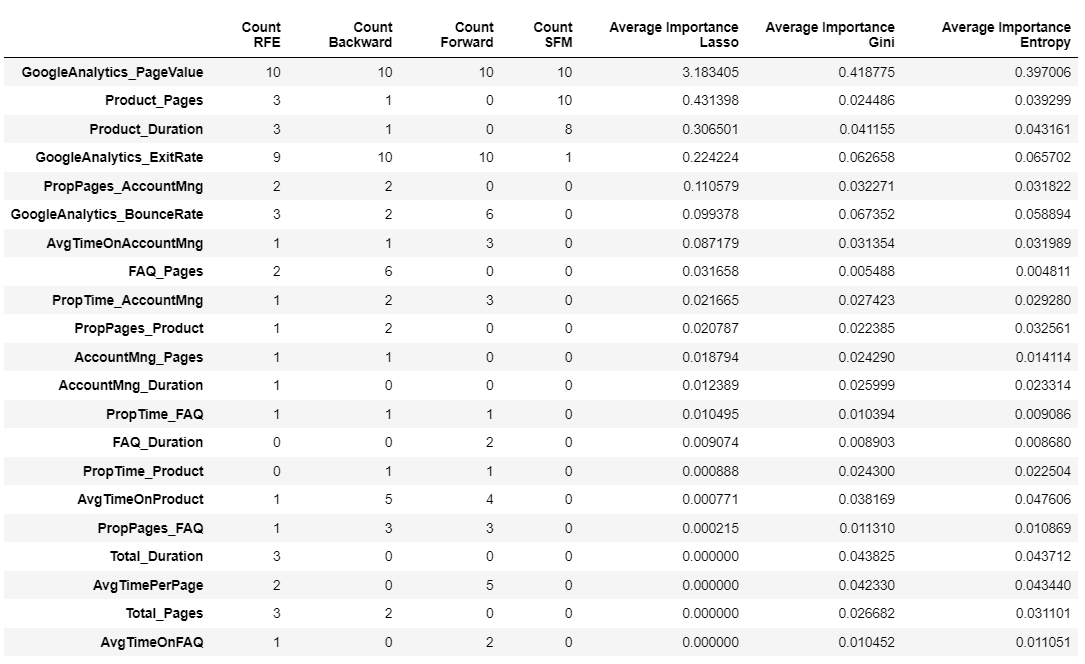

In [203]:
# Chi-Square for categorical data

fold = 1

for train_index, val_index in skf.split(data_non_metric, target):
        
        # Data Partition
        X_train, X_val = data_non_metric.iloc[train_index], data_non_metric.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        
        # CODE FOR Chi-Square
        if fold == 1:
            chi_square_results = pd.DataFrame(index = X_train.columns)
        
        importance_list = []
        
        for var in data_non_metric:
            
            dfObserved = pd.crosstab(y_train, X_train[var]) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns = dfObserved.columns, index = dfObserved.index)

            if p < 0.05:
                importance_list.append(True)
            else: 
                importance_list.append(False)
            
        selected_features = pd.Series(importance_list, index = X_train.columns, name=f'Partition {fold}')    
      
        chi_square_results = pd.concat((chi_square_results, selected_features), axis=1)
        
        fold+=1
        
        
# Add new column with count of True's        
count_chi_square_list = []
for index, row in chi_square_results.iterrows():
    count = 0
    for elem in row:
        if elem == True:
            count+=1
    count_chi_square_list.append(count)

chi_square_results['Count'] = count_chi_square_list 

chi_square_results.sort_values(by='Count', ascending=False, inplace = True)

chi_square_results['Keep'] = chi_square_results['Count'].apply(lambda x: 'Yes' if x == 10 else 'No')
chi_square_results[chi_square_results['Keep'] == 'Yes']

,Partition 1,Partition 2,Partition 3,Partition 4,Partition 5,Partition 6,Partition 7,Partition 8,Partition 9,Partition 10,Count,Keep
Apple,True,True,True,True,True,True,True,True,True,True,10,Yes
Mar,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_15,True,True,True,True,True,True,True,True,True,True,10,Yes
Windows,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_13,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_12,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_8,True,True,True,True,True,True,True,True,True,True,10,Yes
Oct,True,True,True,True,True,True,True,True,True,True,10,Yes
Nov,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_3,True,True,True,True,True,True,True,True,True,True,10,Yes


# Choose the most relevant features

In [231]:
selected_variables = ['GoogleAnalytics_PageValue', 
                   'GoogleAnalytics_ExitRate', 
                   'Product_Pages',
                   'AvgTimeOnAccountMng', 
                   'PropPages_AccountMng',
                   'Traffic_13',
                   'Traffic_12',
                   'Traffic_8',
                   'Traffic_3',
                   'Traffic_2',
                   'Traffic_15',
                   'Apple',
                   'Windows',
                   'Returner',
                   'New_Access',
                   'Covid',
                   'Dec',
                   'Feb',
                   'May',
                   'Mar',
                   'Nov',
                   'Oct',
                  ]

data_selected_features = data[selected_variables]

print(data_selected_features.shape)
data_selected_features.head()

(9999, 22)


,GoogleAnalytics_PageValue,GoogleAnalytics_ExitRate,Product_Pages,AvgTimeOnAccountMng,PropPages_AccountMng,Traffic_13,Traffic_12,Traffic_8,Traffic_3,Traffic_2,...,Windows,Returner,New_Access,Covid,Dec,Feb,May,Mar,Nov,Oct
0,0.0000,0.0667,3,0.0,0.0,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,0.0000,0.0449,23,0.0,0.0,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
2,0.0000,0.0583,8,0.0,0.0,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,False
3,42.4225,0.0250,9,0.0,0.0,False,False,False,False,True,...,True,True,False,True,True,False,False,False,False,False
4,12.5033,0.0093,36,0.0,0.0,False,False,False,True,False,...,True,True,False,True,False,False,False,False,True,False


In [232]:
#data_selected_features.describe().T

<a class="anchor" id="15th-bullet">

## Final Insights:
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| AccountMng_Pages | Discard | Keep | Keep ?| Include in the model |
| AccountMng_Duration | Discard | Keep | Keep | Include in the model |
| FAQ_Pages | Discard | Discard | Keep | Try with and without |
| FAQ_Duration | Discard | Discard | Discard |  Discard |
| Product_Pages | Discard | Discard | Discard |  Discard |
| Product_Duration | Discard | Keep | Keep | Include in the model |
| GoogleAnalytics_BounceRate | Discard | Discard | Keep ? | Discard |
| GoogleAnalytics_ExitRate | Discard | Keep | Keep ?| Include in the model |
| GoogleAnalytics_PageValue | Discard | Keep | Keep | Include in the model |
| Total_Duration | Discard | Discard | Discard |  Discard |
| Total_Pages | Discard | Keep | Keep | Include in the model |
| PropTime_AccountMng | Discard | Discard | Discard |  Discard |
| PropTime_FAQ | Discard | Discard | Discard |  Discard |
| PropTime_Product | Discard | Keep | Keep | Include in the model |
| PropPages_AccountMng | Discard | Discard | Keep ? | Discard |
| PropPages_FAQ | Discard | Keep | Keep ?| Include in the model |
| PropPages_Product | Discard | Keep | Keep | Include in the model |
| AvgTimeOnAccountMng | Discard | Discard | Keep | Try with and without |
| AvgTimeOnFAQ | Discard | Discard | Keep | Try with and without |
| AvgTimeOnProduct | Discard | Discard | Keep | Try with and without |
| Month | Discard | Discard | Discard |  Discard | 


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| OS | Keep |  
| Country | Discard | 
| Type_of_Visitor | Keep |

<hr>

# MODEL EVALUATION

In [233]:
# Separate the metric variables from the non metric ones to plot the following graphics
data_metric_features = data_selected_features.select_dtypes(include=np.number).set_index(data_selected_features.index).columns.to_list()
data_non_metric_features = data_selected_features.select_dtypes(exclude=np.number).set_index(data_selected_features.index).columns.to_list()

### FUNCTION TO TEST THE MODELS

In [234]:
def avg_score(model, split_method, scaler_method, X, y):
    
    score_train = []
    score_val = []
    # Will keep of track of which fold we are in
    fold = 1
    
    for train_index, test_index in split_method.split(X, y=target):
        
        # Data Partition
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        # Join X and y training part
        X_y_train = X_train.join(y_train)
        
        # Define data as all the independent variables
        X_train_filtered = X_y_train_filtered.drop(['Buy'], axis=1)
        # Define target as the dependent variable
        y_train = X_y_train_filtered['Buy']


        # Separate X_train in metric and non metric features
        X_train_metric = X_train_filtered.select_dtypes(include=np.number).set_index(X_train_filtered.index)
        X_train_non_metric = X_train_filtered.select_dtypes(exclude=np.number).set_index(X_train_filtered.index)

        # Separate X_val in metric and non metric features
        X_val_metric = X_val.select_dtypes(include=np.number).set_index(X_val.index)
        X_val_non_metric = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


        # Create a scalling method        
        scaler = scaler_method.fit(X_train_metric)

        # Scalling the X_train_metric
        X_train_metric_scaled = scaler.transform(X_train_metric) 
        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train_metric.columns).set_index(X_train_metric.index)  

        # Scalling the X_val_metric
        X_val_metric_scaled = scaler.transform(X_val_metric) 
        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val_metric.columns).set_index(X_val.index)


        # Join the metric and non metric variables back together
        X_train_final = X_train_metric_scaled.join(X_train_non_metric)
        X_val_final = X_val_metric_scaled.join(X_val_non_metric)     


        # Define our model and fit to our scalled data
        model = model.fit(X_train_final, y_train) 


        # Predict the dependent variable
        y_train_pred = model.predict(X_train_final)
        y_val_pred = model.predict(X_val_final)

        # Calculate de f1 score
        value_train = f1_score(y_train, y_train_pred)
        value_val = f1_score(y_val, y_val_pred)        

        # Append results to the lists created above
        score_train.append(value_train)
        score_val.append(value_val)
        fold+=1

        
    # Print the results  
    print('\nAverage score of Train:', round(np.mean(score_train), 5))
    print('Average score of Valid:', round(np.mean(score_val), 5))
    print(f'Difference between Train and Validation: {round(np.mean(score_train)-np.mean(score_val), 5)}')

### GRADIENT BOOST GRID

In [235]:
#data_scalled = data_metric_scaled.join(data_non_metric)
#display(data_scalled)
#data_scalled = data_scalled[[selected_variables]]
#display(data_scalled)

In [236]:
param_gb = [{
    'max_depth': [8], 
    'min_samples_split': [300,400],
    'min_samples_leaf' : [300,400],
    'n_estimators' :[100,200],
    'learning_rate' : [0.1,0.2,0.3],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8]
}]

grid_gb = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10), 
                       param_grid = param_gb, 
                       scoring='f1',
                       n_jobs=4, 
                       cv=3)
#print(grid_gb)
grid_gb.fit(data_selected_features,target) # fit to the entire dataset ???  ---> falta fazer scalling

print(f'Best parameters: {grid_gb.best_params_}')
print(f'Best score: {grid_gb.best_score_}')


# --------------- GRADIENT BOOST PARAMETERS ---------------
grad_boost = GradientBoostingClassifier(grid_gb.best_params_)   # Não sei se dá assim !!

Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 300, 'min_samples_split': 300, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.6587813877953768


In [230]:
from sklearn.pipeline import Pipeline

gb_pipe = Pipeline([('mms', MinMaxScaler() ),
                    ('gradient_boost', GradientBoostingClassifier() )])

param_gb = [{
    'max_depth': [8,10], 
    'min_samples_split': [300,400,500],
    'min_samples_leaf' : [300,400,500],
    'n_estimators' :[100,200],
    'learning_rate' : [0.001, 0.1, 0.2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8]
}]

gs_knn = GridSearchCV(gb_pipe,
                      param_grid=param_gb,
                      scoring='f1',
                      cv=5)

gs_knn.fit(X_train, y_train)
print(f'Best parameters: {gs_knn.best_params_}')

# find best model score
print(gs_knn.score(X_train, y_train))
sss
print(gs_knn.score(X_val, y_val))


ValueError: Invalid parameter learning_rate for estimator Pipeline(steps=[('mms', MinMaxScaler()),
                ('gradient_boost', GradientBoostingClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

###  NEURAL NETWORKS GRID

In [100]:
#param_nn = {
#    'hidden_layer_sizes': [(8),(6),(4),(6,3),(8,4),(8,4,2)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#    'max_iter' : [100,200],
#}
#
#grid_nn = GridSearchCV(MLPClassifier(),
#                       scoring='f1', 
#                       param_grid = param_nn, 
#                       n_jobs=-1, 
#                       cv=5)
#grid_nn.fit(data_selected_features,target)
#
#print(f'Best parameters: {grid_nn.best_params_}')
#print(f'Best score: {grid_nn.best_score_}')
#
#
## --------------- NEURAL NETWORKS PARAMETERS ---------------
#neural_networks_grid = MLPClassifier(grid_nn.best_params_)
#

In [209]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_knn.fit(X_train, y_train)
print(f'Best parameters: {gs_knn.best_params_}')

# find best model score
print(gs_knn.score(X_train, y_train))

print(gs_knn.score(X_val, y_val))


Best parameters: {'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
0.8476666666666667
0.8408408408408409


### 1 - Change the model to use and its parameters

In [210]:
# ---------------  DECISION TREE ---------------
model_DT = DecisionTreeClassifier(    
    criterion='gini',
    max_depth= 3, 
    max_features= 8,
    splitter='best',
    max_leaf_nodes= 8,
    min_samples_leaf= 400,
    min_samples_split= 400,
    )




# --------------- KNN ---------------
model_KNN = KNeighborsClassifier(
   n_neighbors=9,
#    *,
    weights='uniform',
#    algorithm='auto',
    leaf_size=15,
#    p=2,
#    metric='minkowski',
#    metric_params=None,
#    n_jobs=None,
    )

#Best parameters: {'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


# --------------- LOG FUNCTION ---------------
log_model = LogisticRegression() # Ganda miséria


# --------------- GRADIENT BOOST ---------------
grad_boost = GradientBoostingClassifier(
    
#    loss='deviance',
    learning_rate=0.1,
    n_estimators=200,
    subsample= 0.7,
#    criterion='friedman_mse',
    min_samples_split= 500,
    min_samples_leaf= 500,
#    min_weight_fraction_leaf=0.0,
    max_depth= None,
#    min_impurity_decrease=0.0,
#    min_impurity_split=None,
#    init=None,
#    random_state=None,
    max_features='log2',
#    verbose=0,
#    max_leaf_nodes=None,
#    warm_start=False,
#    validation_fraction=0.1,
#    n_iter_no_change=None,
#    tol=0.0001,
#   ccp_alpha=0.0,
    )


# min_samples_split=4, n_estimators = 182, random_state=0, 
# loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2')



# --------------- NEURAL NETWORKS ---------------
neural_networks = MLPClassifier(
    
    hidden_layer_sizes=(100,),
    activation='relu',
#    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
#    learning_rate_init=0.001,
#    power_t=0.5,
    max_iter=200,
#    shuffle=True,
#    random_state=None,
#    tol=0.0001,
#    verbose=False,
#    warm_start=False,
#    momentum=0.9,
#    nesterovs_momentum=True,
#    early_stopping=False,
#    validation_fraction=0.1,
#    beta_1=0.9,
#    beta_2=0.999,
#    epsilon=1e-08,
#    n_iter_no_change=10,
#    max_fun=15000,
)

### 2- Change the way to split the dataset

In [211]:
# ---------- STRATIFIED KFOLDS ----------
skf = StratifiedKFold(n_splits=10) # try to always use this one!!

# ---------- KFOLDS ----------
kf = KFold(n_splits=10)

# ---------- REPEATED KFOLDS ----------
rkf2 = RepeatedKFold(n_splits=6, n_repeats=2)

# ---------- LEAVE ONE OUT ----------
loo = LeaveOneOut()

# ---------- LEAVE P OUT ----------
lpo = LeavePOut(p=1)

### 3- Change the way we scale the data

In [212]:
# ---------- MINMAX SCALER ----------
min_max = MinMaxScaler()
min_max2 = MinMaxScaler(feature_range = (-1,1))

# ---------- STANDARD SCALER ----------
standard_scaler = StandardScaler()

# ---------- ROBUST SCALER ----------
robust_scaler = RobustScaler()

In [213]:
# --------------- GRADIENT BOOST ---------------
grad_boost = GradientBoostingClassifier(
    
    loss='exponential',
    learning_rate=0.25,
    n_estimators=200,
    subsample= 0.7,
#    criterion='friedman_mse',
    min_samples_split= 500,
    min_samples_leaf= 500,
#    min_weight_fraction_leaf=0.0,
    max_depth= 5,
#    min_impurity_decrease=0.0,
#    min_impurity_split=None,
#    init=None,
    random_state=10,
    max_features='log2',
#    verbose=0,
#    max_leaf_nodes=None,
#    warm_start=False,
#    validation_fraction=0.1,
#    n_iter_no_change=None,
#    tol=0.0001,
#   ccp_alpha=0.0,
    )


# min_samples_split=4, n_estimators = 182, random_state=0, 
# loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2')

### 4- Call the function above

In [217]:
avg_score(model = grad_boost,
          split_method = skf, 
          scaler_method = min_max, 
          X = data_selected_features, 
          y = target
         )

Average score of Train: 0.6963
Average score of Valid: 0.64345
Difference between Train and Validation: 0.05286



In [219]:
avg_score(model = grad_boost,
          split_method = skf, 
          scaler_method = min_max, 
          X = data_selected_features, 
          y = target
         )

ValueError: Shape of passed values is (8999, 22), indices imply (8999, 5)

In [215]:
scalling = [min_max, min_max2, standard_scaler, robust_scaler]

for scale in scalling:
    print(f'----- Score with {scale} -----')
    avg_score(model = grad_boost, # change parameters
              split_method = skf, 
              scaler_method = scale, # 4 different scalling methods
              X = data_selected_features, 
              y = target)

----- Score with MinMaxScaler() -----
Average score of Train: 0.6963
Average score of Valid: 0.64345
Difference between Train and Validation: 0.05286

----- Score with MinMaxScaler(feature_range=(-1, 1)) -----
Average score of Train: 0.6965
Average score of Valid: 0.64413
Difference between Train and Validation: 0.05237

----- Score with StandardScaler() -----
Average score of Train: 0.69528
Average score of Valid: 0.64849
Difference between Train and Validation: 0.04679

----- Score with RobustScaler() -----
Average score of Train: 0.69478
Average score of Valid: 0.64959
Difference between Train and Validation: 0.04519



# Choose the best model and the best scalling method

In [150]:
best_model = grad_boost
best_scalling = standard_scaler

In [151]:
# Apply best_model and best_scalling to the dataset with the selected features
random_state = 10  # O que é que isto faz ??? Define que fracao vai para train e para validation

X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.7, stratify = target, random_state=random_state)


# Separate X_train in metric and non metric features
X_train_metric = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_non_metric = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


# Separate X_val in metric and non metric features
X_val_metric = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_non_metric = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


# Create a scalling method        
best_scaler = best_scalling.fit(X_train_metric)

# Scalling the X_train_metric
X_train_metric_scaled = best_scaler.transform(X_train_metric) 
X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train_metric.columns).set_index(X_train_metric.index)

# Scalling the X_val_metric
X_val_metric_scaled = best_scaler.transform(X_val_metric) 
X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val_metric.columns).set_index(X_val.index)


# Join the X_train and X_val back together
X_train_final = X_train_metric_scaled.join(X_train_non_metric)
X_val_final = X_val_metric_scaled.join(X_val_non_metric)     


# Define our model and fit to our scalled data
best_model_fitted = best_model.fit(X_train_final, y_train)


# Predict the dependent variable
y_train_pred = best_model.predict(X_train_final)
y_val_pred = best_model.predict(X_val_final)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred) 


print('Average score of Train:', round(np.mean(value_train), 5))
print('Average score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}')

Average score of Train: 0.69135
Average score of Valid: 0.67196
Difference between Train and Validation: 0.01938


# Performance Measures

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [153]:
#def metrics(y_train, pred_train , y_val, pred_val):
#    print('___________________________________________________________________________________________________________')
#    print('                                                     TRAIN                                                 ')
#    print('-----------------------------------------------------------------------------------------------------------')
#    print(classification_report(y_train, pred_train))
#    print(confusion_matrix(y_train, pred_train))
#
#
#    print('___________________________________________________________________________________________________________')
#    print('                                                VALIDATION                                                 ')
#    print('-----------------------------------------------------------------------------------------------------------')
#    print(classification_report(y_val, pred_val))
#    print(confusion_matrix(y_val, pred_val))

In [154]:
#labels_train = log_model.predict(X_train)
#labels_val = log_model.predict(X_val)

In [155]:
#metrics(y_train=y_train, pred_train=labels_train , y_val=y_val, pred_val=labels_val)

# Deployment

In [156]:
test = pd.read_csv('test.csv')
test.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,Windows,6,Spain,3,Returner


### Change type of variables

In [157]:
test = change_data_types(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Access_ID                   2300 non-null   string        
 1   Date                        2300 non-null   datetime64[ns]
 2   AccountMng_Pages            2300 non-null   int64         
 3   AccountMng_Duration         2300 non-null   float64       
 4   FAQ_Pages                   2300 non-null   int64         
 5   FAQ_Duration                2300 non-null   float64       
 6   Product_Pages               2300 non-null   int64         
 7   Product_Duration            2300 non-null   float64       
 8   GoogleAnalytics_BounceRate  2300 non-null   float64       
 9   GoogleAnalytics_ExitRate    2300 non-null   float64       
 10  GoogleAnalytics_PageValue   2300 non-null   float64       
 11  OS                          2300 non-null   string      

### Create new variables

In [158]:
test = create_new_variables(test)
print(test.shape)

(2300, 78)


In [159]:
# best_model_fitted
# best_scaler

# Apply best_model_fitted and best_scaler to the dataset
test_data = test[selected_variables]

# Separate test_data in metric and non metric features
test_data_metric = test_data.select_dtypes(include=np.number).set_index(test_data.index)
test_data_non_metric = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)

# Use best_scaler created above
test_data_metric_scaled = best_scaler.transform(test_data_metric) 
test_data_metric_scaled = pd.DataFrame(test_data_metric_scaled, columns = test_data_metric.columns).set_index(test_data.index)

# Join the test_data back together
test_data_final = test_data_metric_scaled.join(test_data_non_metric)


# Use best_model_fitted created above to create new columns called 'Buy'
test_data_final['Buy'] = best_model_fitted.predict(test_data_final)

display(test_data_final.head(3))

,GoogleAnalytics_PageValue,GoogleAnalytics_ExitRate,Product_Pages,AvgTimeOnAccountMng,PropPages_AccountMng,Traffic_13,Traffic_12,Traffic_8,Traffic_3,Traffic_2,...,Returner,New_Access,Covid,Dec,Feb,May,Mar,Nov,Oct,Buy
0,-0.310322,0.448636,1.284684,-0.421306,-0.634509,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,0
1,-0.310322,-0.765286,0.560477,-0.034628,-0.354890,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,0
2,-0.310322,-0.374224,0.116607,-0.421306,-0.634509,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,0


In [160]:
test_data_final['Buy'].value_counts()

0    1992
1     308
Name: Buy, dtype: int64

In [161]:
test_data_final['Access_ID'] = test['Access_ID']

sample_submission = test_data_final[['Access_ID', 'Buy']]
sample_submission

,Access_ID,Buy
0,798519314,0
1,798663101,0
2,798663221,0
3,798760918,0
4,798856982,1
...,...,...
2295,962042726,0
2296,962063064,0
2297,962147749,1
2298,962182167,0


In [163]:
# Change name of file - TIAGO
sample_submission.to_csv(r'C:\Users\tsoom\OneDrive\Documentos\IMS - Data Science\Machine Learning\Github Project\Project-Machine-Learning\submissions\48.csv', index=False, sep=',')

text_file = open("submissions/sub48.txt", "w")
n = text_file.write((str(best_model)+'\n\n'+str(selected_variables)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa

In [271]:
# Change name of file  - JOHNNY
sample_submission.to_csv(r'C:\Users\Admin\Documents\GitHub\Project-Machine-Learning\submissions\35.csv', index=False, sep=',')

text_file = open("submissions/sub35.txt", "w")
n = text_file.write((str(best_model)+'\n\n'+str(selected_variables)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)+'\n\nValue'+ str(round(np.mean(value_train), 5))+'\n\n'+ str(round(np.mean(value_val), 5))))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa